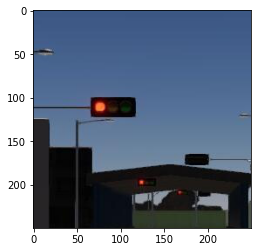

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("./red.jpg", cv2.IMREAD_COLOR)[300:550, 750:1000]
plt.imshow(img[:,:,::-1])

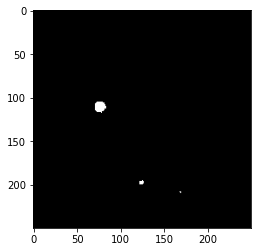

In [5]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
red_mask = cv2.inRange(img_hls, (0/2, 0.24*255, 0.22*255), (26/2, 0.70*255, 1.0*255))
plt.imshow(red_mask, cmap="gray")

3
0.5
12.5
109.5


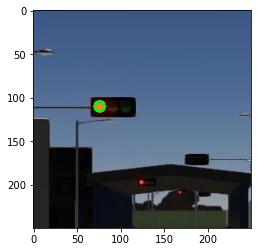

In [8]:
img_circle = img.copy()
cnts = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
print(len(cnts))  # number of contours
for c in cnts:
    # peri = cv2.arcLength(c, True)
    # approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    area = cv2.contourArea(c)
    # print(len(approx), area)
    print(area)
    # if len(approx) > 5 and area > 100 and area < 500:
    if area > 100 and area < 500:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(img_circle, (int(x), int(y)), int(r), (0, 255, 0), 2)

plt.imshow(img_circle[:,:,::-1], cmap="gray")